In [1]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## `Clean missing values`

* Identify any null or missing data, and impute appropriate replacement values.

In [2]:
# Check for missing data
print(df_flights.isnull().sum())

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


In [3]:
# Impute missing values in the DepDel15 column with the mode
df_flights['DepDel15'].fillna(df_flights['DepDel15'].mode()[0], inplace=True)


In [4]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

* Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

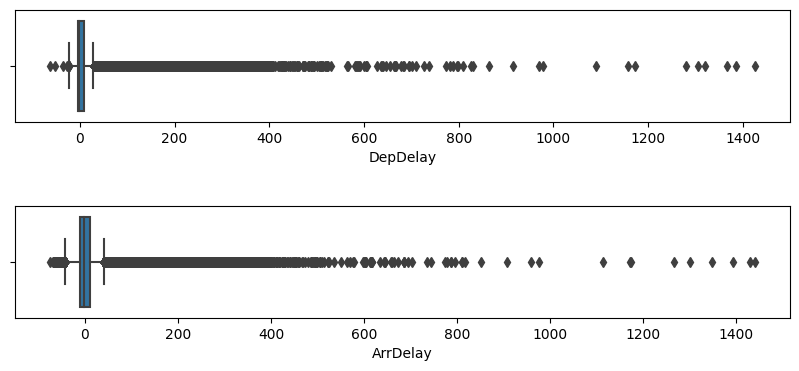

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for DepDelay and ArrDelay columns
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
sns.boxplot(x=df_flights['DepDelay'], ax=axes[0])
sns.boxplot(x=df_flights['ArrDelay'], ax=axes[1])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.75)


In [6]:
# Calculate IQR for DepDelay and ArrDelay columns
Q1 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.25)
Q3 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers that are more than 1.5 times the IQR
df_flights = df_flights[~((df_flights[['DepDelay', 'ArrDelay']] < (Q1 - 1.5 * IQR)) | (df_flights[['DepDelay', 'ArrDelay']] > (Q3 + 1.5 * IQR))).any(axis=1)]


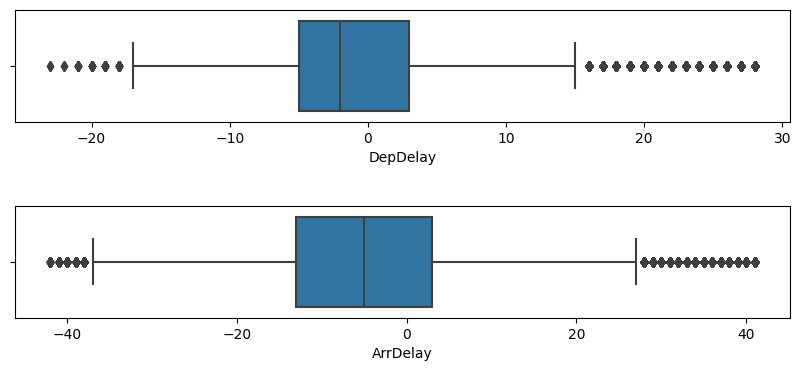

In [7]:
# Create boxplots for DepDelay and ArrDelay columns
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
sns.boxplot(x=df_flights['DepDelay'], ax=axes[0])
sns.boxplot(x=df_flights['ArrDelay'], ax=axes[1])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.75)

## `Explore the data`

* Summary statistics for the numeric fields in the dataset.

In [8]:
# Summary statistics
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,235067.0,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000
mean,2013.0,7.017969,15.801303,3.903555,12755.279520,12736.502418,1293.518831,0.373447,0.081492,1475.744520,-4.029843,0.099772,0.012107
std,0.0,2.003171,8.849921,1.996283,1507.709532,1504.564524,470.134495,8.029744,0.273589,488.196462,12.959713,0.299696,0.109365
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.000000,0.000000,1.000000,-42.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1101.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1250.000000,-2.000000,0.000000,1458.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.000000,0.000000,1858.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.000000,1.000000,2359.000000,41.000000,1.000000,1.000000


* Distribution of the DepDelay and ArrDelay columns.

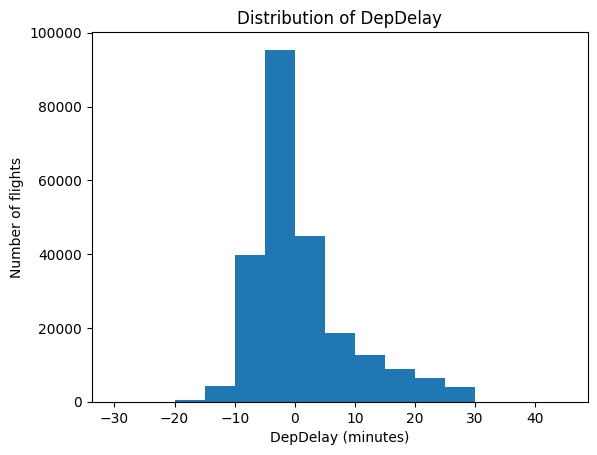

In [9]:
# DepDelay
plt.hist(df_flights['DepDelay'], bins=range(-30, 50, 5))
plt.xlabel('DepDelay (minutes)')
plt.ylabel('Number of flights')
plt.title('Distribution of DepDelay')
plt.show()


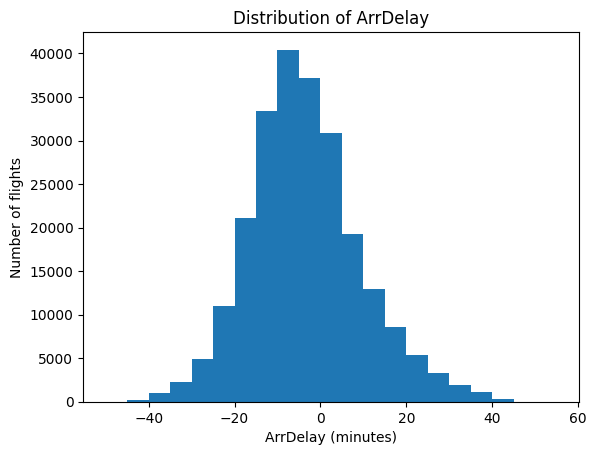

In [10]:
# ArrDelay
plt.hist(df_flights['ArrDelay'], bins=range(-50, 60, 5))
plt.xlabel('ArrDelay (minutes)')
plt.ylabel('Number of flights')
plt.title('Distribution of ArrDelay')
plt.show()


* Average departure and arrival delays

In [11]:
mean_dep_delay = df_flights['DepDelay'].mean()
mean_arr_delay = df_flights['ArrDelay'].mean()

print('Mean Departure Delay:', mean_dep_delay, 'minutes')
print('Mean Arrival Delay:', mean_arr_delay, 'minutes')


Mean Departure Delay: 0.3734467194459452 minutes
Mean Arrival Delay: -4.029842555526722 minutes


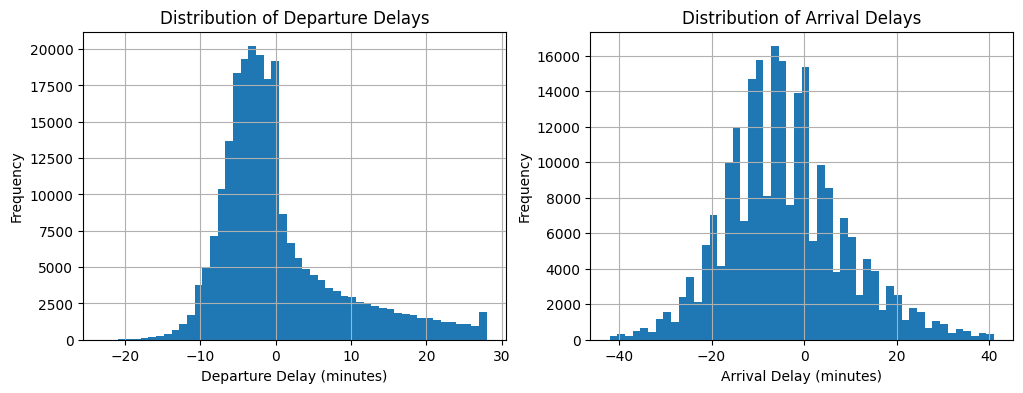

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_flights['DepDelay'].hist(ax=axes[0], bins=50)
axes[0].set_xlabel('Departure Delay (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Departure Delays')

df_flights['ArrDelay'].hist(ax=axes[1], bins=50)
axes[1].set_xlabel('Arrival Delay (minutes)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Arrival Delays')

plt.show()


* Arrival delay performance by carriers

In [13]:
carrier_arrival_delay = df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)
print(carrier_arrival_delay)

Carrier
F9    0.642458
WN   -0.863588
HA   -2.420617
FL   -2.717458
MQ   -2.959516
YV   -3.204525
US   -3.366135
OO   -3.470170
AS   -3.890767
VX   -4.917170
AA   -4.999310
B6   -5.119020
DL   -5.888902
EV   -5.936101
9E   -6.965387
UA   -7.088330
Name: ArrDelay, dtype: float64


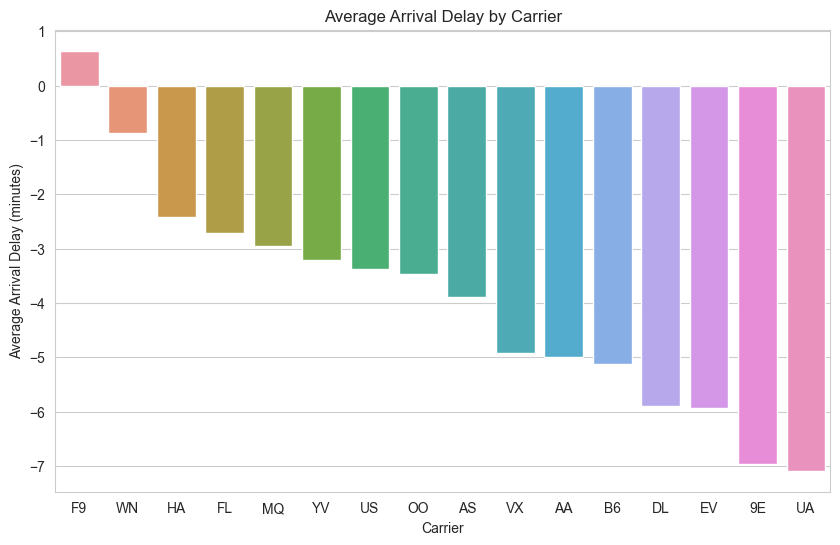

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=carrier_arrival_delay.index, y=carrier_arrival_delay.values)
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Carrier')
plt.show()

* Difference in arrival delays for different days of the week

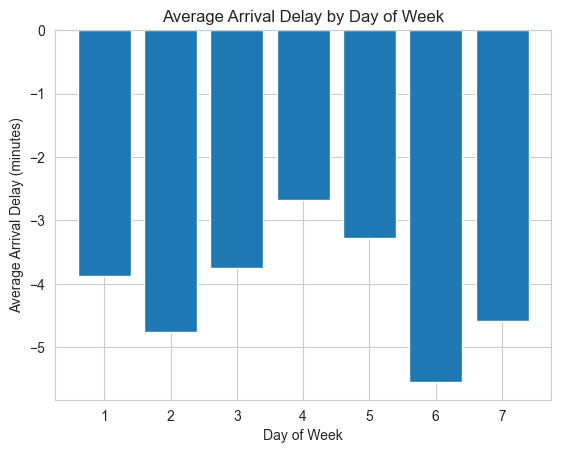

In [15]:
# Group the data by day of week and calculate mean arrival delay
grouped = df_flights.groupby('DayOfWeek')['ArrDelay'].mean()

# Create a bar plot of mean arrival delay by day of week
plt.bar(grouped.index, grouped.values)

# Set the axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Day of Week')
plt.show()


* Departure airport has the highest average departure delay

In [16]:
# Group flights by OriginAirportID and calculate mean of DepDelay
airport_delays = df_flights.groupby('OriginAirportID')['DepDelay'].mean()

# Sort in descending order and display top 10
airport_delays = airport_delays.sort_values(ascending=False)
print(airport_delays.head(10))


OriginAirportID
13232    4.995548
11259    4.133062
12191    3.726537
11292    2.792541
10821    2.630400
13796    2.354980
11298    2.335833
12889    1.884416
10397    1.568024
15016    1.332174
Name: DepDelay, dtype: float64


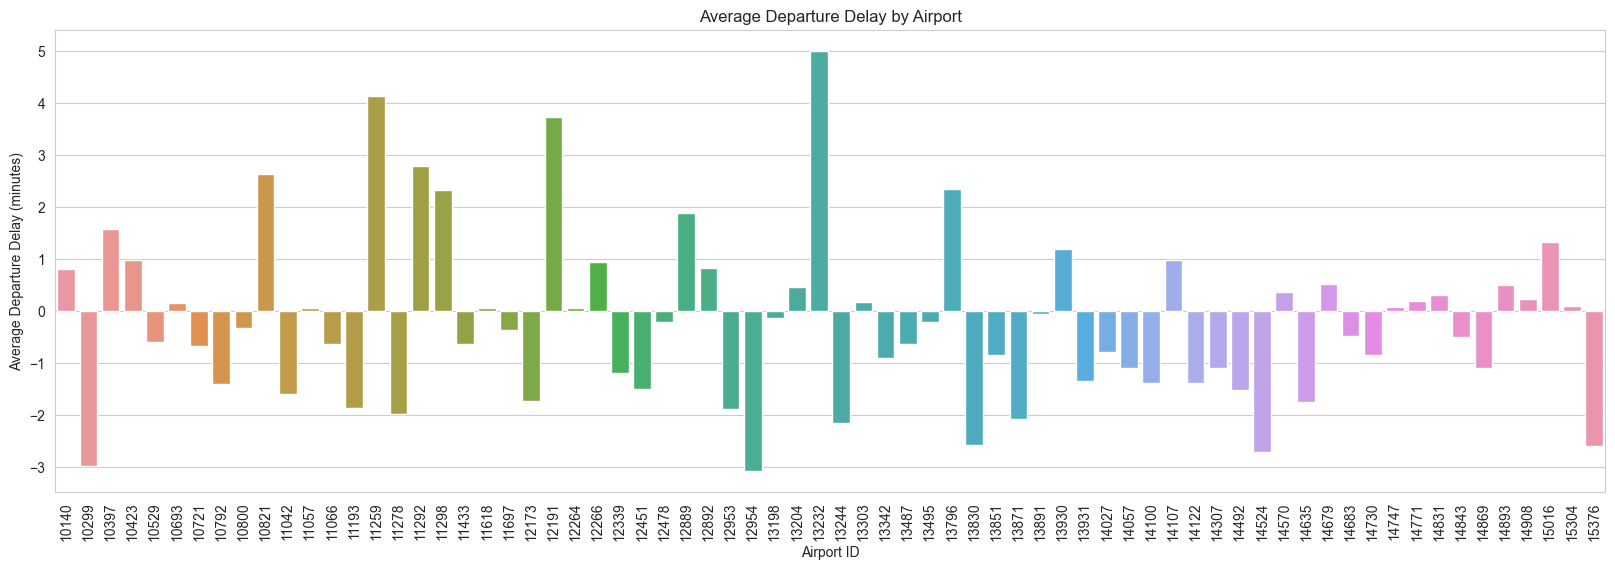

In [17]:
# Create a bar plot of airport delays
plt.figure(figsize=(20, 6))
sns.barplot(x=airport_delays.index, y=airport_delays.values)
plt.xticks(rotation=90)
plt.xlabel('Airport ID')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Airport')
plt.show()

* Departure and Arrival

In [18]:
# Group flights by whether they had a late departure or not
grouped = df_flights.groupby('DepDel15')

# Calculate the mean arrival delay for each group
mean_arrival_delay = grouped['ArrDelay'].mean()

print(mean_arrival_delay)


DepDel15
0.0    -5.651727
1.0    14.250731
Name: ArrDelay, dtype: float64


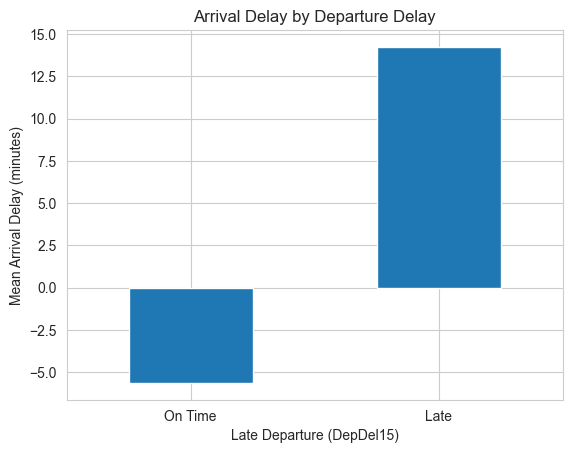

In [19]:
# Create a bar plot of mean arrival delay by DepDel15
mean_arrival_delay.plot(kind='bar')

# Add labels and title
plt.xlabel('Late Departure (DepDel15)')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Arrival Delay by Departure Delay')
plt.xticks([0, 1], ['On Time', 'Late'], rotation=0)

# Show the plot
plt.show()


* Route has the most late arrivals

Route with the most late arrivals: San Francisco - Los Angeles


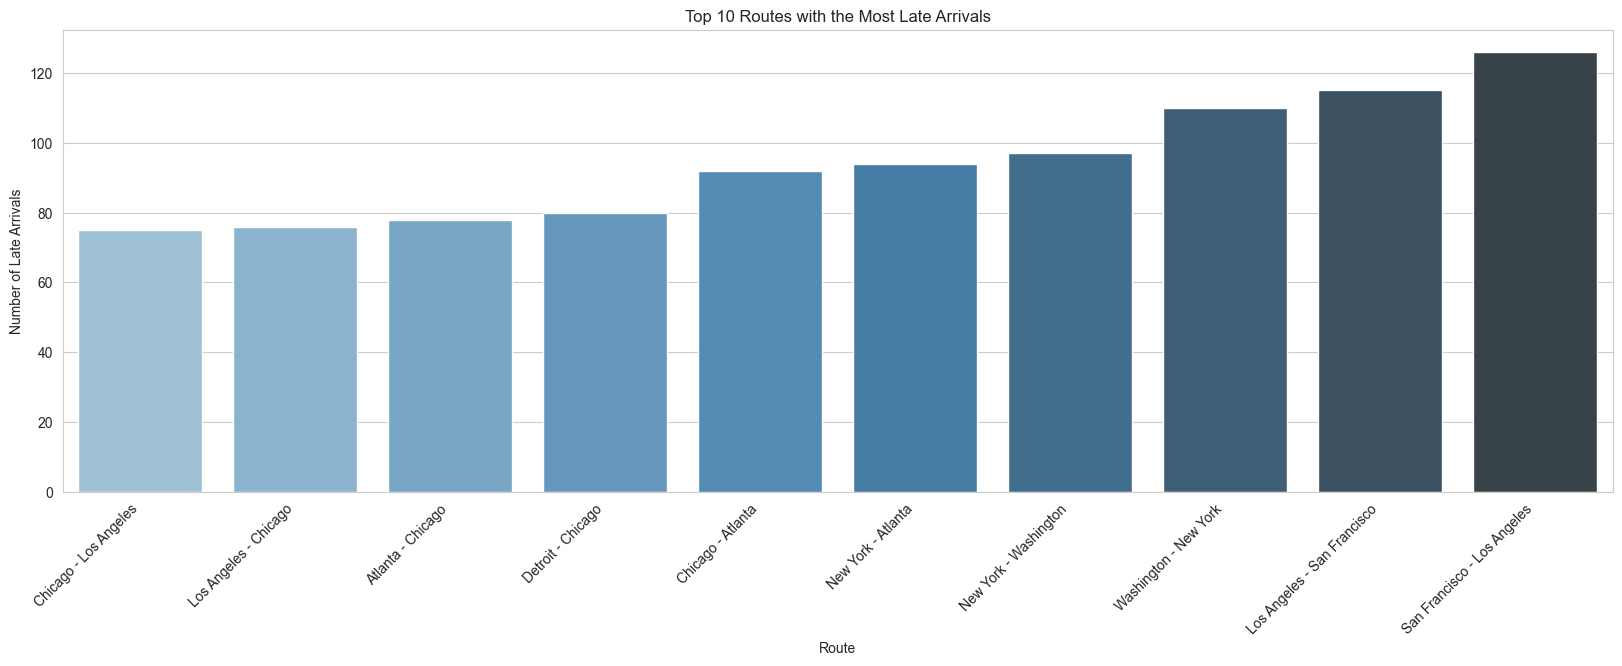

In [20]:
# Create a new column for the route
df_flights['route'] = df_flights['OriginCity'].astype(str) + ' - ' + df_flights['DestCity'].astype(str)

# Calculate the number of late arrivals for each route
route_delays = df_flights.loc[df_flights['ArrDel15'] == 1].groupby('route')['ArrDel15'].count().reset_index(name='num_late_arrivals')

# Find the route with the most late arrivals
most_late_route = route_delays['num_late_arrivals'].argmax()
print('Route with the most late arrivals:', route_delays.loc[most_late_route]['route'])

# Sort by number of late arrivals
route_delays = route_delays.sort_values('num_late_arrivals', ascending=False)

# Get the top 10 routes with the most late arrivals
top_10_routes = route_delays.head(10)

# Create a bar plot of the top 10 routes with the most late arrivals
plt.figure(figsize=(20,6))
sns.barplot(x='route', y='num_late_arrivals', data=top_10_routes, palette='Blues_d', order=top_10_routes['route'][::-1])
plt.title('Top 10 Routes with the Most Late Arrivals')
plt.xlabel('Route')
plt.ylabel('Number of Late Arrivals')
plt.xticks(rotation=45, ha='right')
plt.show()


* Route has the highest average arrival delay

In [21]:
# Create a new column with the route information
df_flights['route'] = df_flights['OriginCity'].astype(str) + '-' + df_flights['DestCity'].astype(str)

# Calculate the average arrival delay for each route
route_delays = df_flights.groupby('route')['ArrDelay'].mean().reset_index(name='avg_arrival_delay')

# Find the route with the highest average arrival delay
highest_delay_route = route_delays.loc[route_delays['avg_arrival_delay'].idxmin()]

print('Route with the highest average arrival delay:', highest_delay_route['route'])
print('Average arrival delay for this route:', highest_delay_route['avg_arrival_delay'])



Route with the highest average arrival delay: Indianapolis-Boston
Average arrival delay for this route: -26.0


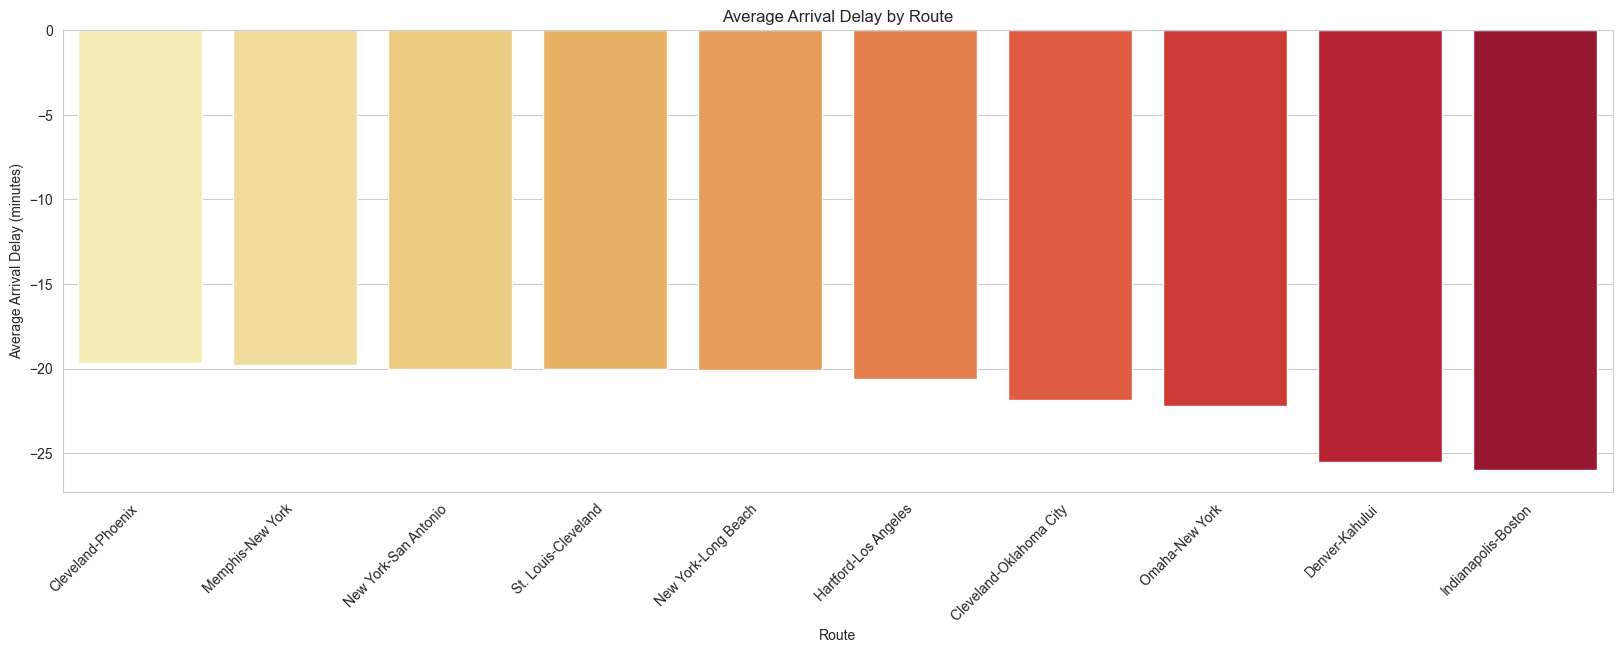

In [22]:
# Sort by number of late arrivals
route_delays = route_delays.sort_values('avg_arrival_delay', ascending=True)

# Get the top 10 routes with the most late arrivals
top_10_routes = route_delays.head(10)

# Create a bar chart of the average arrival delay for each route
plt.figure(figsize=(20,6))
sns.barplot(data=top_10_routes, x='route', y='avg_arrival_delay', palette='YlOrRd', order=top_10_routes['route'][::-1])
plt.title('Average Arrival Delay by Route')
plt.xlabel('Route')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()
